
# Student Performance Indicator
Life cycle of Machine learning Project

   - Understanding the Problem Statement
   - Data Collection
   - Data Checks to perform
   - Exploratory data analysis
   - Data Pre-Processing
   - Model Training
   - Choose best model

## 1) Problem statement

    - This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.



In [34]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
data=pd.read_csv(r"data\stud.csv")

In [3]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.shape

(1000, 8)

### Dataset information

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score




### 3. Data Checks to perform

   - Check Missing values
   - Check Duplicates
   - Check data type
   - Check the number of unique values of each column
   - Check statistics of data set
   - Check various categories present in the different categorical column



In [5]:
#checking the missing values in the dataset
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset.

In [6]:
#checking duplicates
data.duplicated().sum()

0

There are no duplicate values in the dataset


In [7]:
#checking the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#checking the number of unique values of each column
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
#checking the statistics of the dataset
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


The scores are around the mean of approx 67 with standard deviation of approx 15

In [10]:
#checking various categories present on different categorical columns
for i in data.select_dtypes(include="object").columns:
    print("Categories in {0} variable".format(i), data[i].unique())

Categories in gender variable ['female' 'male']
Categories in race_ethnicity variable ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable ['standard' 'free/reduced']
Categories in test_preparation_course variable ['none' 'completed']


#### Adding total scores and average scores column in the dataframe


In [11]:
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']
data['avg_score'] = round(data['total_score']/3,2)
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [12]:
#creating seperate dataframes for numerical and categorical features.
num_data=data.select_dtypes(include='int')
cat_data=data.select_dtypes(exclude='int')

In [13]:
#checking in what field more students have recieved full marks.
read_full = data[data.reading_score == 100]['avg_score'].count()
math_full = data[data.math_score ==100]['avg_score'].count()
writing_full = data[data.writing_score==100]['avg_score'].count()

print('No. of students who got full marks in reading ', read_full)
print('No. of students who got full marks in maths ', math_full)
print('No. of students who got full marks in writing ', writing_full)

No. of students who got full marks in reading  17
No. of students who got full marks in maths  7
No. of students who got full marks in writing  14


In [14]:
reading_less_20 = data[data['reading_score'] <= 20]['avg_score'].count()
writing_less_20 = data[data['writing_score'] <= 20]['avg_score'].count()
math_less_20 = data[data['math_score'] <= 20]['avg_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1



__Insights__

- From above values we get students have performed the worst in Maths
- Best performance is in reading section



## 4. Exploring Data ( Visualization )

Visualizing how a feature is affecting different score distributions to make some conclusions.

### Gender column

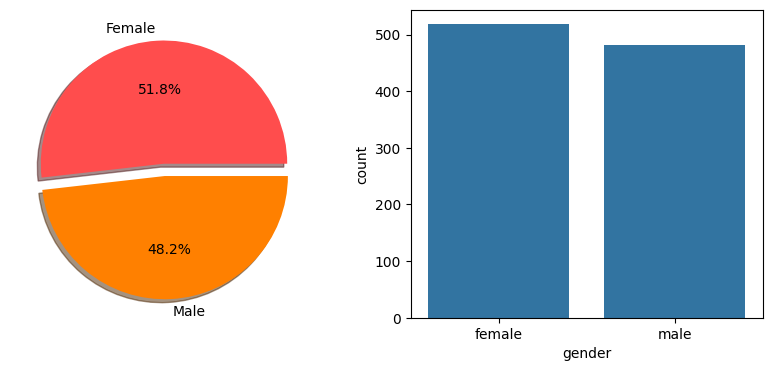

In [15]:
#univariate analysis
#checking distribution of gender in the data.
plt.figure(figsize=[10,4])
plt.subplot(121)
plt.pie(x=data['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.subplot(122)
sns.countplot(data=data, x='gender')
plt.show()

The percentage of females is slightly larger in the data but on overall basis the dataset in balanced with respect to gender.

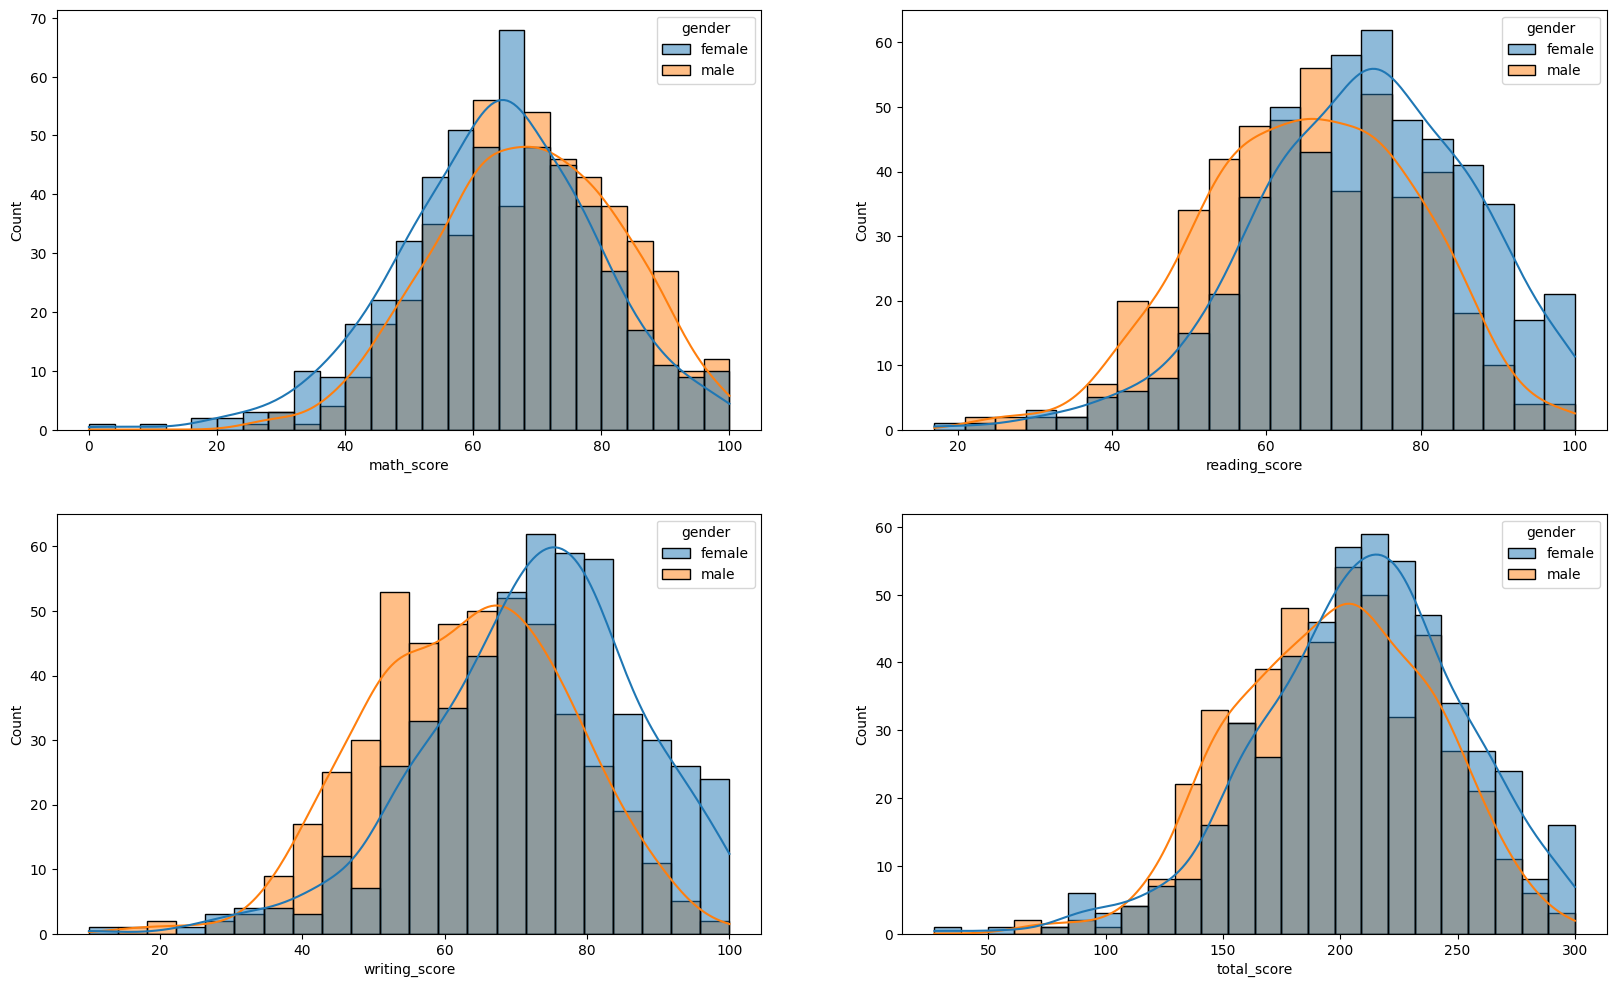

In [16]:
#bivariate analysis
#checking the effect of gender feature on distribution on scores
plt.figure(figsize=[20,12])
for i,j in enumerate(num_data.columns):
    plt.subplot(2,2,i+1)
    sns.histplot(data=data, x=j, kde=True, hue='gender')
plt.show()

- Female students have performed better than the male students generally.
- But in mathematics the male students have performed better.

### Race ethnicity feature

In [17]:
data.race_ethnicity.value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

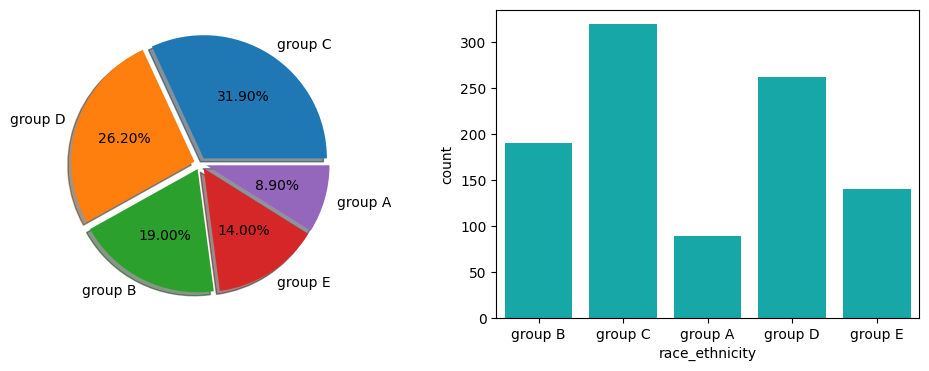

In [18]:
#univariate analysis
#checking distribution of race ethnicity in the data.
plt.figure(figsize=[12,4])
plt.subplot(121)
plt.pie(x=data['race_ethnicity'].value_counts(),labels=["group C","group D","group B","group E","group A"],explode=[0.05,0.05,0.05,0.05,0.05],shadow=True,autopct='%.2f%%')
plt.subplot(122)
sns.countplot(data=data, x='race_ethnicity',color='c',)
plt.show()

- Group C has highest number of data points in the data.
- Group A has least amount of data points in the data.
- The data is manageably balanced with respect to race ethnicity feature.

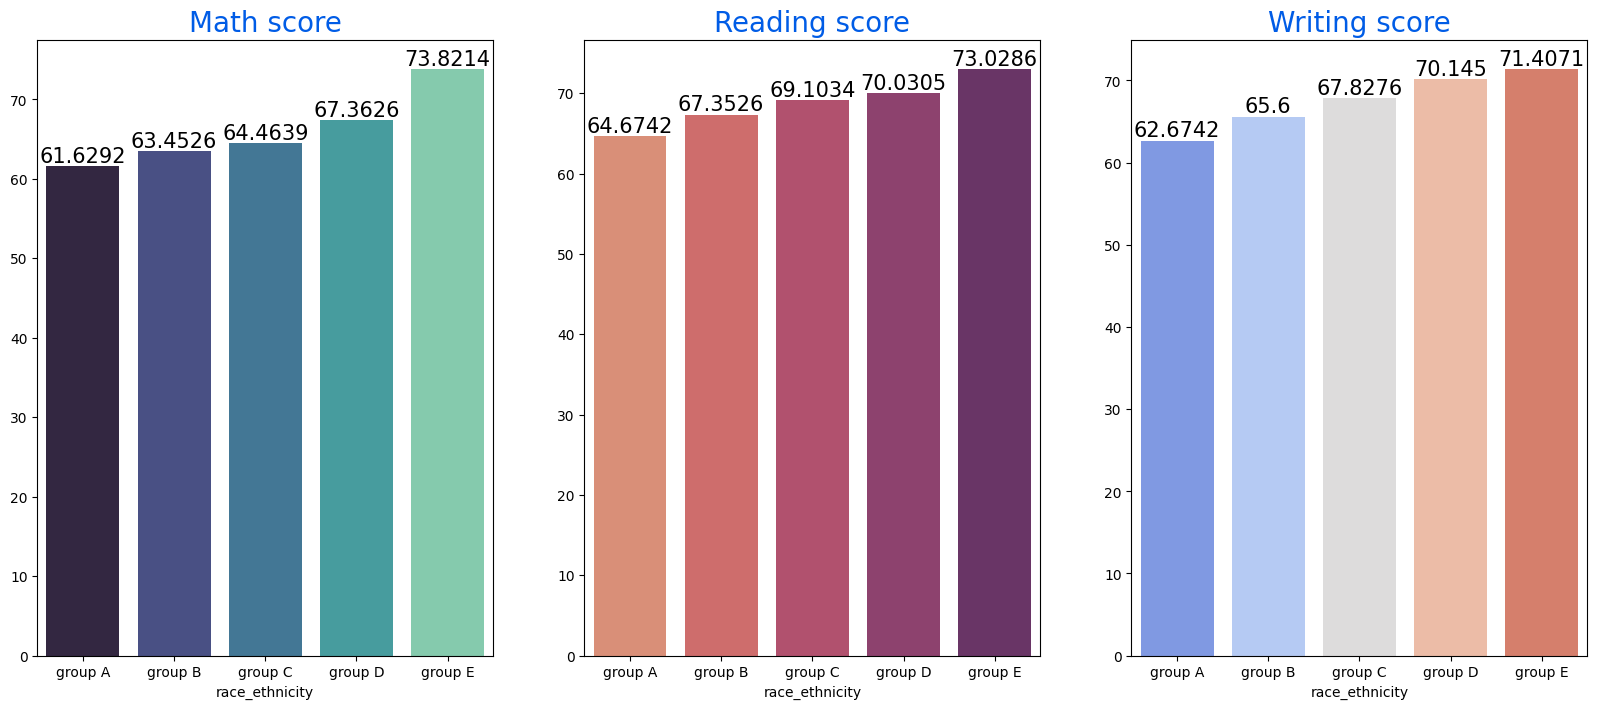

In [19]:
#bivariate analysis
#does race ethnicity have any effect on the scores
Group_data2=data.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

It is clearly observalble that:
- Group E has performed exceptionally better than others in all scores.
- Group A has recieved lower scores with respect to other groups.

### Parental level of education feature

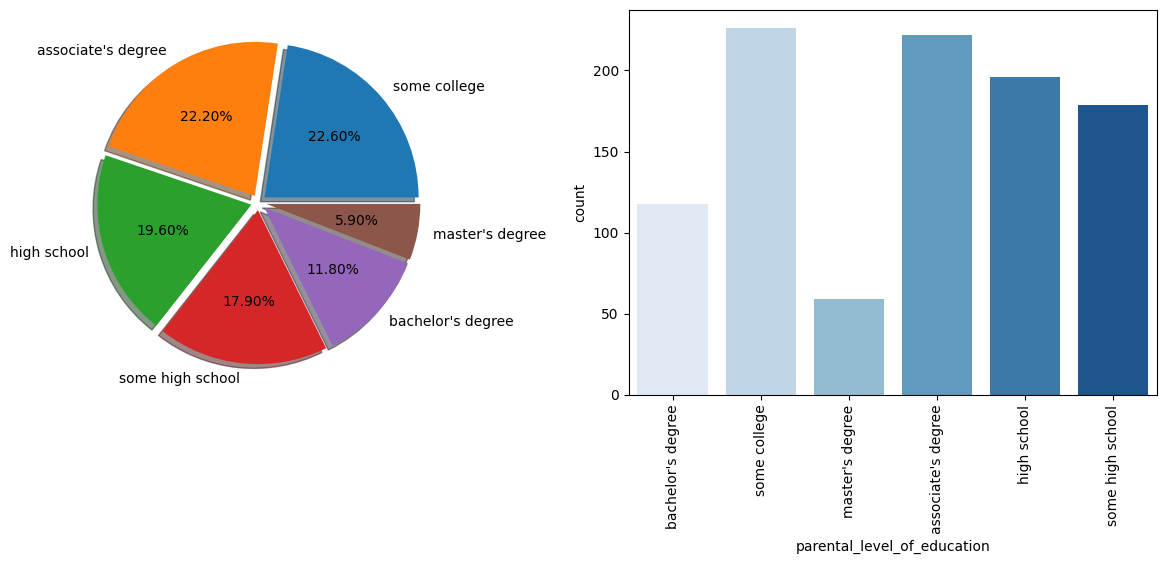

In [20]:
#univariate analysis
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.pie(x=data['parental_level_of_education'].value_counts(),labels=['some college', "associate's degree", 'high school', 'some high school',"bachelor's degree", "master's degree"],explode=[0.05,0.05,0.05,0.05,0.05,0.05],shadow=True,autopct='%.2f%%')
plt.subplot(122)
sns.countplot(data=data, x='parental_level_of_education',palette='Blues',)
plt.xticks(rotation=90)
plt.show()

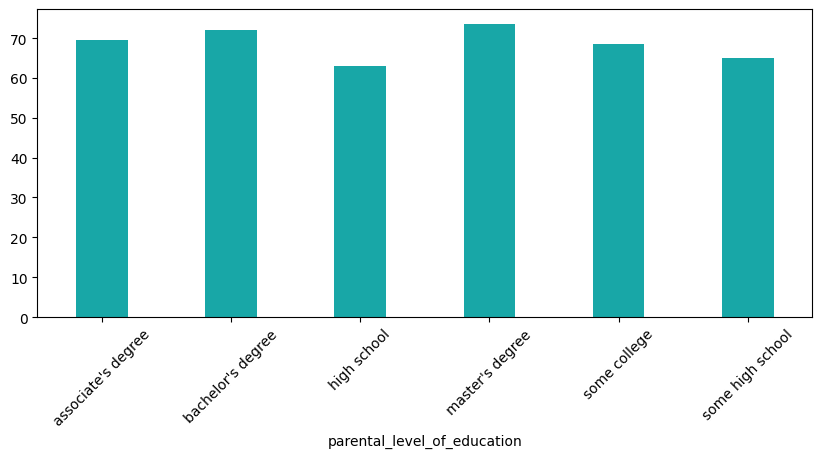

In [21]:
#bivariate analysis
#how is the parental level of education affecting the scores of the students
group_data=data.groupby('parental_level_of_education')
plt.figure(figsize=[10,4])
sns.barplot(x=group_data["avg_score"].mean().index, y=group_data['avg_score'].mean().values,orient='v',width=0.5, gap=0.2,color='c')
plt.xticks(rotation=45)
plt.show()

- The score of student whose parents possess master and bachelor level education are higher than others.

### Lunch feature

In [22]:
data.lunch.value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

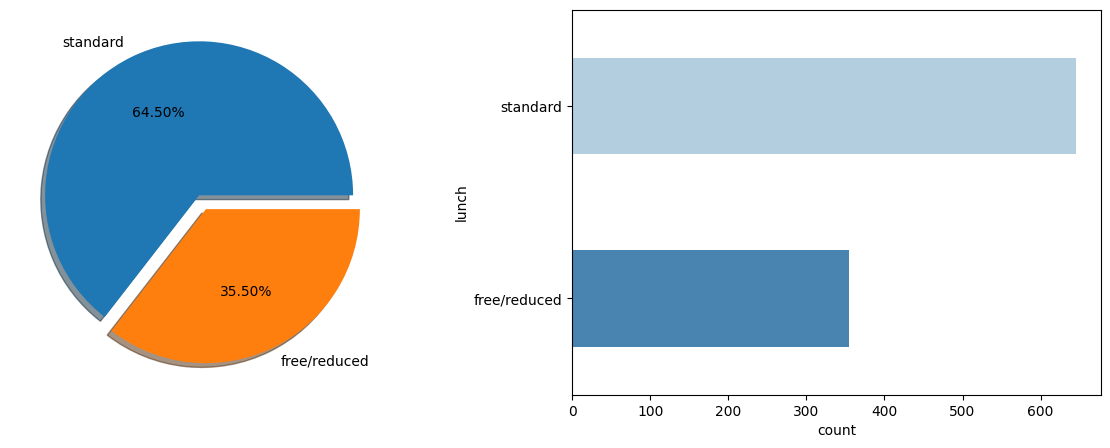

In [23]:
#univariate analysis
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.pie(x=data['lunch'].value_counts(),labels=["standard","free/reduced"],explode=[0.05,0.05],shadow=True,autopct='%.2f%%')
plt.subplot(122)
sns.countplot(data=data, y='lunch',palette='Blues',width=0.5)
plt.xticks(rotation=0)
plt.show()


Insights

- Students being served Standard lunch was more than free lunch



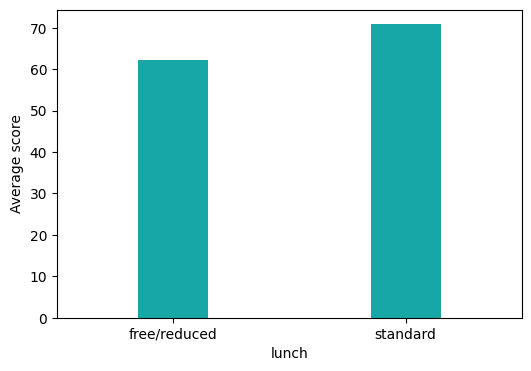

In [24]:
#bivariate analysis
group_data=data.groupby('lunch')
plt.figure(figsize=[6,4])
sns.barplot(x=group_data["avg_score"].mean().index, y=group_data['avg_score'].mean().values,orient='v',width=0.3,color='c')
plt.xticks(rotation=0)
plt.ylabel('Average score')
plt.show()

Students with standard lunch have performed better in scores

### Test preparation course feature


In [25]:
data.test_preparation_course.value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

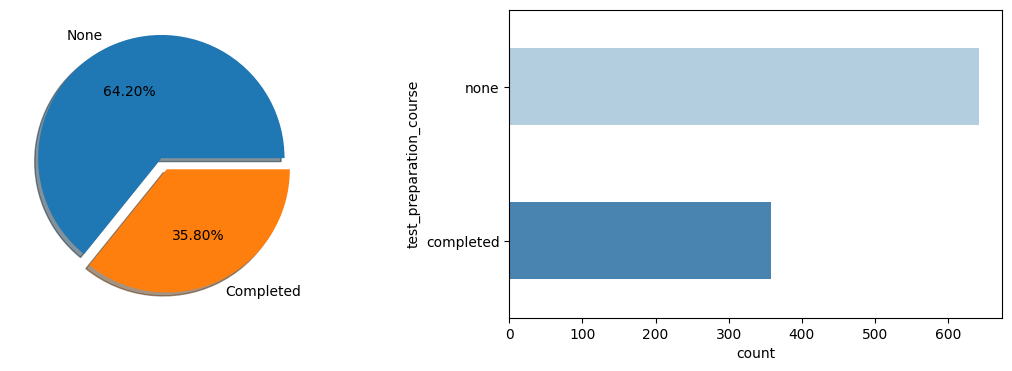

In [26]:
 #univariate analysis
plt.figure(figsize=[14,4])
plt.subplot(121)
plt.pie(x=data['test_preparation_course'].value_counts(),labels=["None","Completed"],explode=[0.05,0.05],shadow=True,autopct='%.2f%%')
plt.subplot(122)
sns.countplot(data=data, y='test_preparation_course',palette='Blues',width=0.5)
plt.xticks(rotation=0)
plt.show()

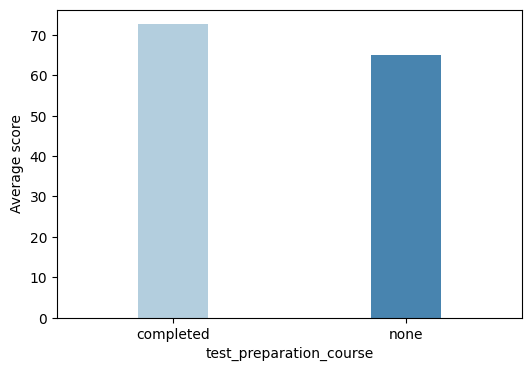

In [27]:
#bivariate analysis
group_data=data.groupby('test_preparation_course')
plt.figure(figsize=[6,4])
sns.barplot(x=group_data["avg_score"].mean().index, y=group_data['avg_score'].mean().values,orient='v',width=0.3,palette='Blues')
plt.xticks(rotation=0)
plt.ylabel('Average score')
plt.show()

Insights
- Students who have completed the test preparation course have performed better in the scores.

### Multivariate analysis

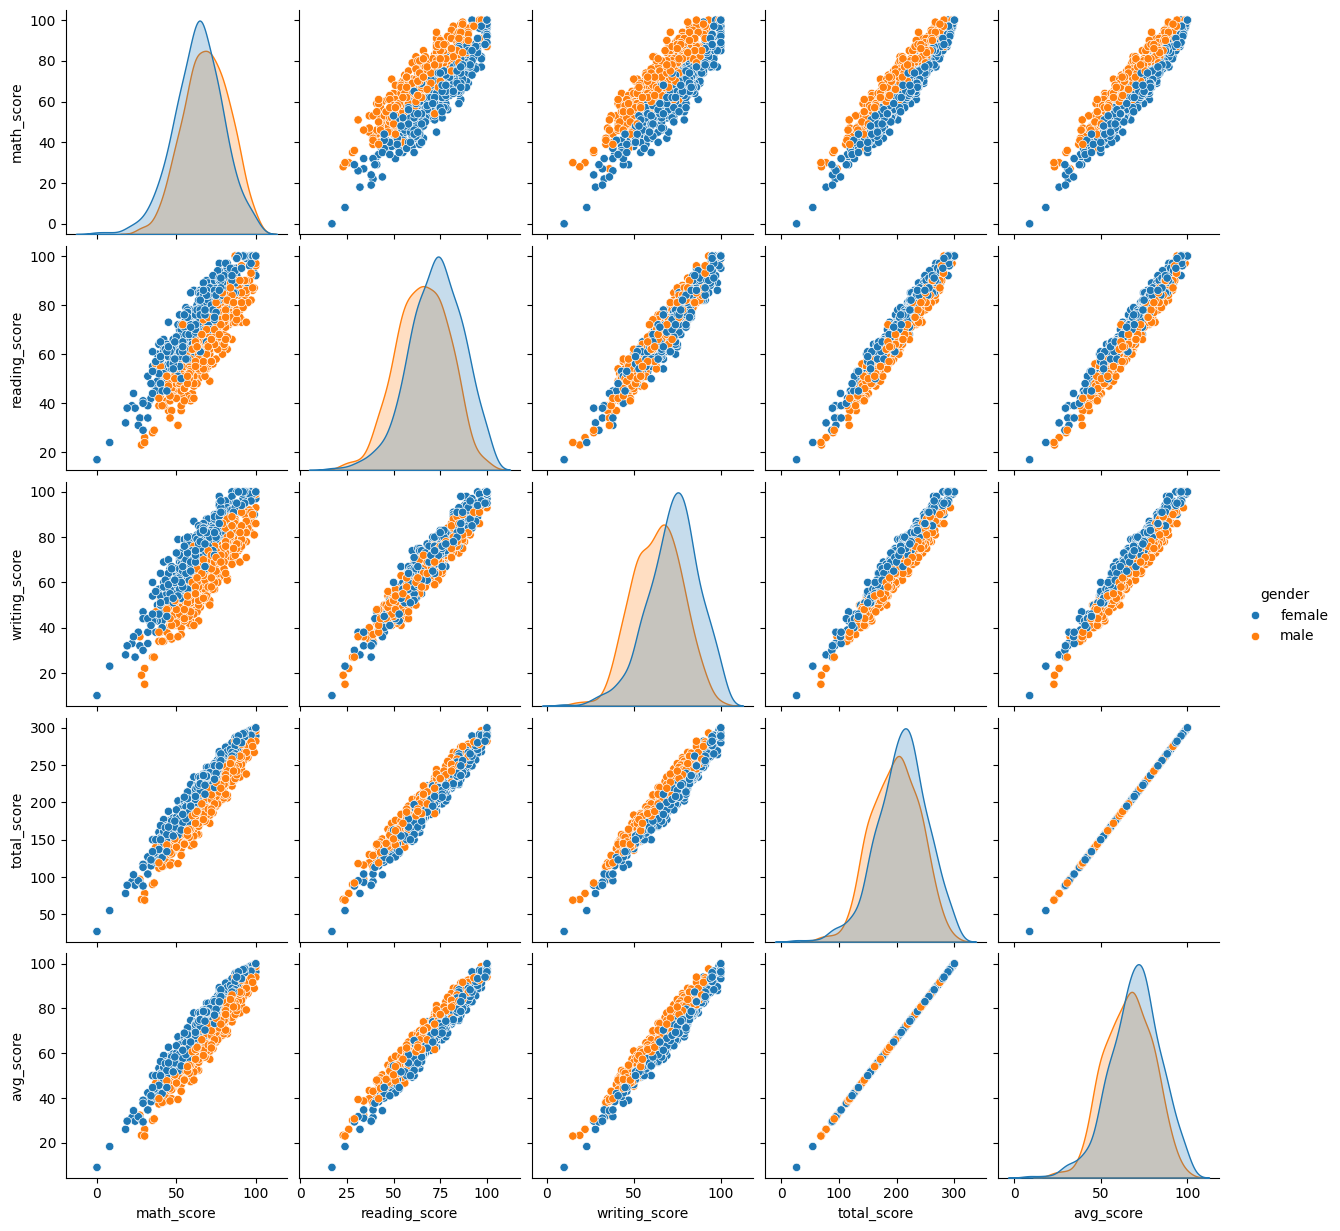

In [28]:
sns.pairplot(data, hue='gender')
plt.show()

From the above plot it is clear that all scores increase linearly with each other.

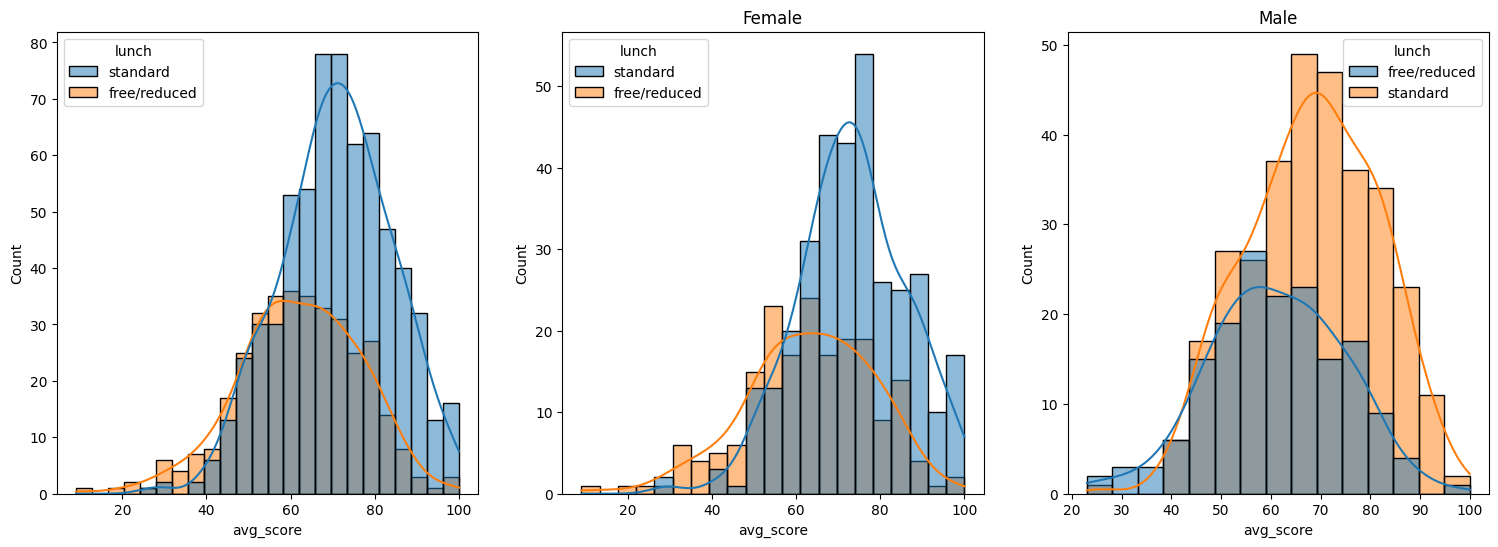

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='avg_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x='avg_score',kde=True,hue='lunch')
plt.title("Female")
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='avg_score',kde=True,hue='lunch')
plt.title('Male')
plt.show()


Insights

- Standard lunch helps perform well in exams.
 - Standard lunch helps perform well in exams be it a male or a female.



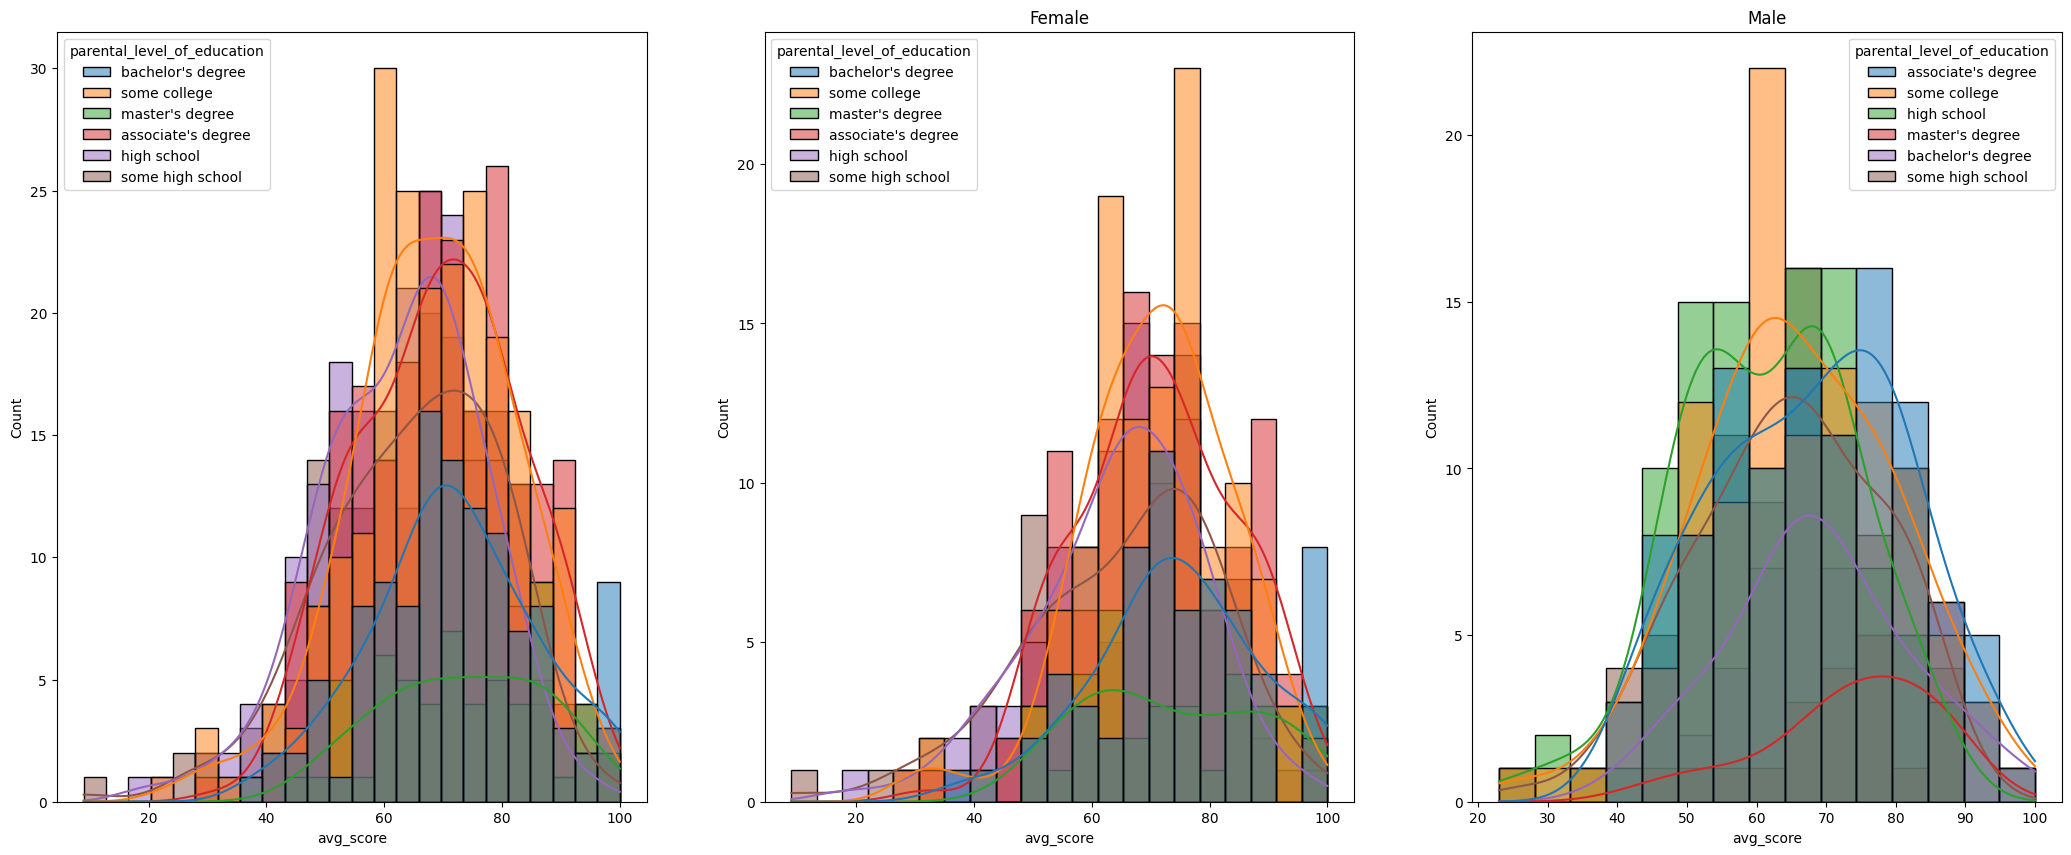

In [30]:
plt.subplots(1,3,figsize=(35,10))
plt.subplot(141)
sns.histplot(data=data,x='avg_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x='avg_score',kde=True,hue='parental_level_of_education')
plt.title("Female")
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='avg_score',kde=True,hue='parental_level_of_education')
plt.title('Male')
plt.show()


Insights

- In general parent's education don't help student perform well in exam.
 -   2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
  -  3rd plot we can see there is no effect of parent's education on female students.



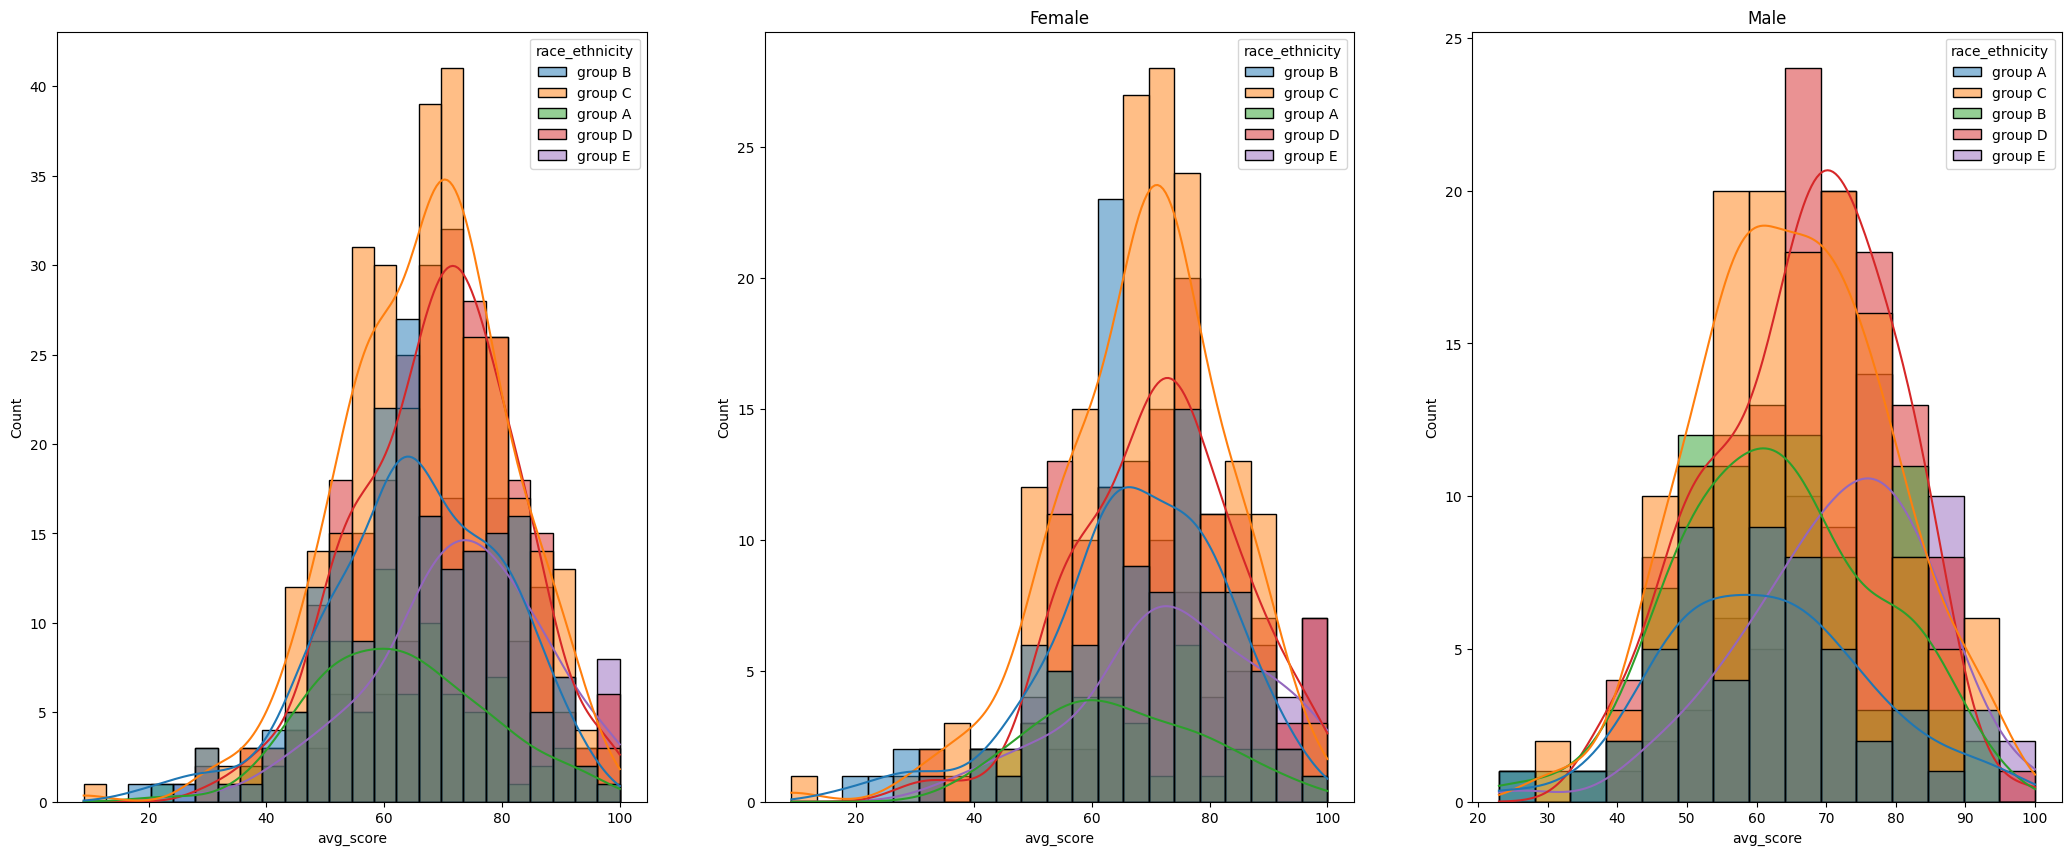

In [31]:
plt.subplots(1,3,figsize=(35,10))
plt.subplot(141)
sns.histplot(data=data,x='avg_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x='avg_score',kde=True,hue='race_ethnicity')
plt.title("Female")
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='avg_score',kde=True,hue='race_ethnicity')
plt.title('Male')
plt.show()


Insights

- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female



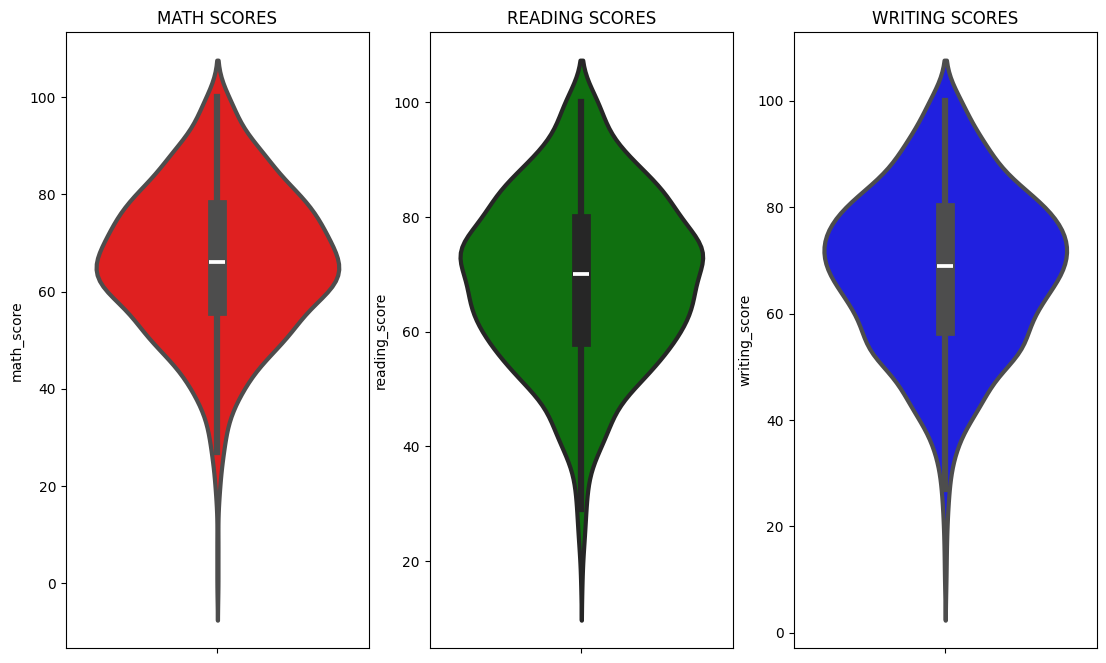

In [32]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=data,color='blue',linewidth=3)
plt.show()


Insights

- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80



### Checking outliers in the data

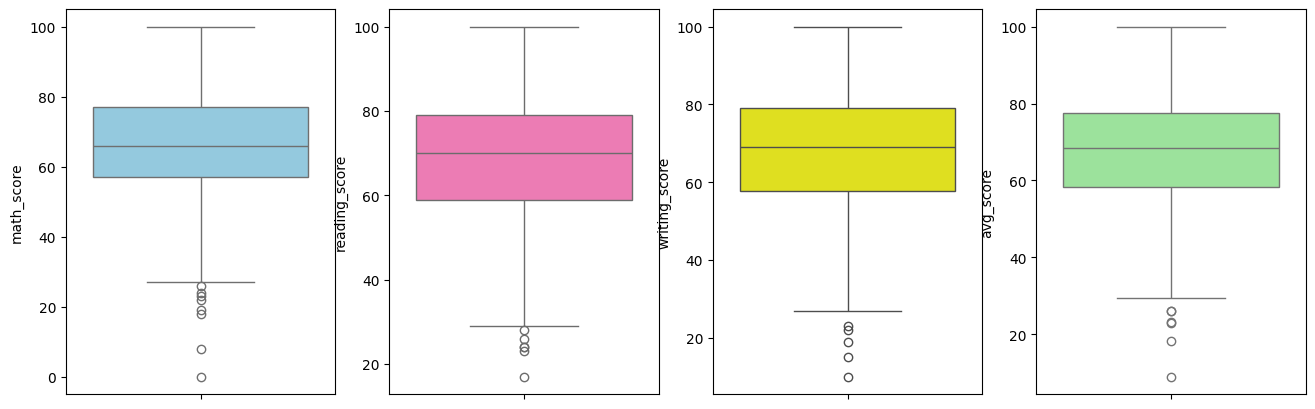

In [33]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['avg_score'],color='lightgreen')
plt.show()